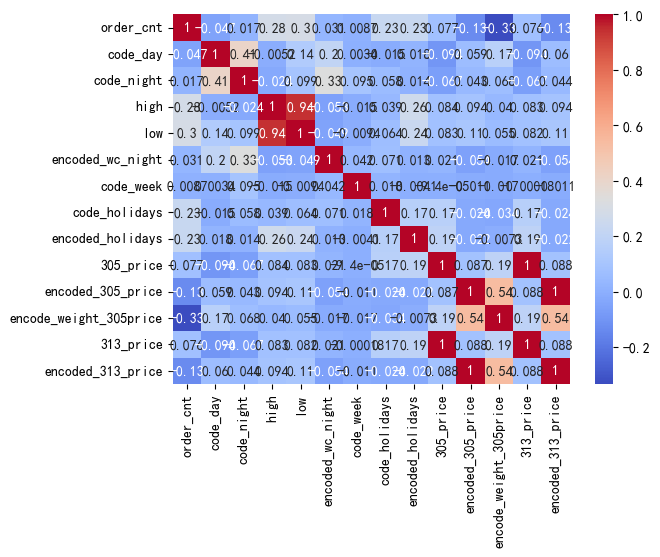

In [9]:
# 导入需要的算法库和模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split




# 超参数
COLS_Y = 'order_cnt'
COLS_ALL = ['order_cnt', 'code_day' , 'code_night', 'high', 'low', 'encoded_wc_night', 'code_week', 'code_holidays','encoded_holidays', '305_price','encoded_305_price','encode_weight_305price','313_price' ,'encoded_313_price']

# 读取excel文件并获取指定列
import pandas as pd
df = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL, encoding='GBK')
correlation_matrix = df.corr()

# 绘制热图
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
# 第一步：特征处理
# 将code_week进行余弦和正弦编码
# df['sin_week'] = np.sin(2 * np.pi * df['code_week'] / 7)
# df['cos_week'] = np.cos(2 * np.pi * df['code_week'] / 7)


# # 显示前几行数据，验证是否添加成功
# print(df.head())


In [11]:
# 第二步：训练模型（决策树）
cols_x = df.drop(columns=COLS_Y)
cols_y = df[COLS_Y]
Xtrain, Xtest, Ytrain, ytest = train_test_split(cols_x,cols_y,test_size=0.2, random_state=180) 

print(Xtrain.shape)
print(Xtest.shape)

# 使用列表推导式从COLS_ALL中移除COLS_Y
COLS_UPDATED = [col for col in COLS_ALL if col != COLS_Y]
print(COLS_UPDATED)
feature_name = COLS_UPDATED
clf = tree.DecisionTreeRegressor(criterion="squared_error",max_depth=7,min_samples_leaf=5)  #最大{max_depth}层，最少也需要{lefa}个样本才生成分支
clf = clf.fit(Xtrain, Ytrain) 
print('精准度： '+str(clf.score(Xtest, ytest))) #返回预测的准确度
print([*zip(feature_name,clf.feature_importances_)]) #返回决策树各自变量的重要程度

(291, 13)
(73, 13)
['code_day', 'code_night', 'high', 'low', 'encoded_wc_night', 'code_week', 'code_holidays', 'encoded_holidays', '305_price', 'encoded_305_price', 'encode_weight_305price', '313_price', 'encoded_313_price']
精准度： 0.005660099825159137
[('code_day', 0.0), ('code_night', 0.015046115676391532), ('high', 0.20250336689007012), ('low', 0.22242427398536335), ('encoded_wc_night', 0.03824517701239741), ('code_week', 0.059833637401975795), ('code_holidays', 0.031507835740224865), ('encoded_holidays', 0.028087239791532926), ('305_price', 0.035329229477421065), ('encoded_305_price', 0.0), ('encode_weight_305price', 0.23777345955346563), ('313_price', 0.12924966447115735), ('encoded_313_price', 0.0)]


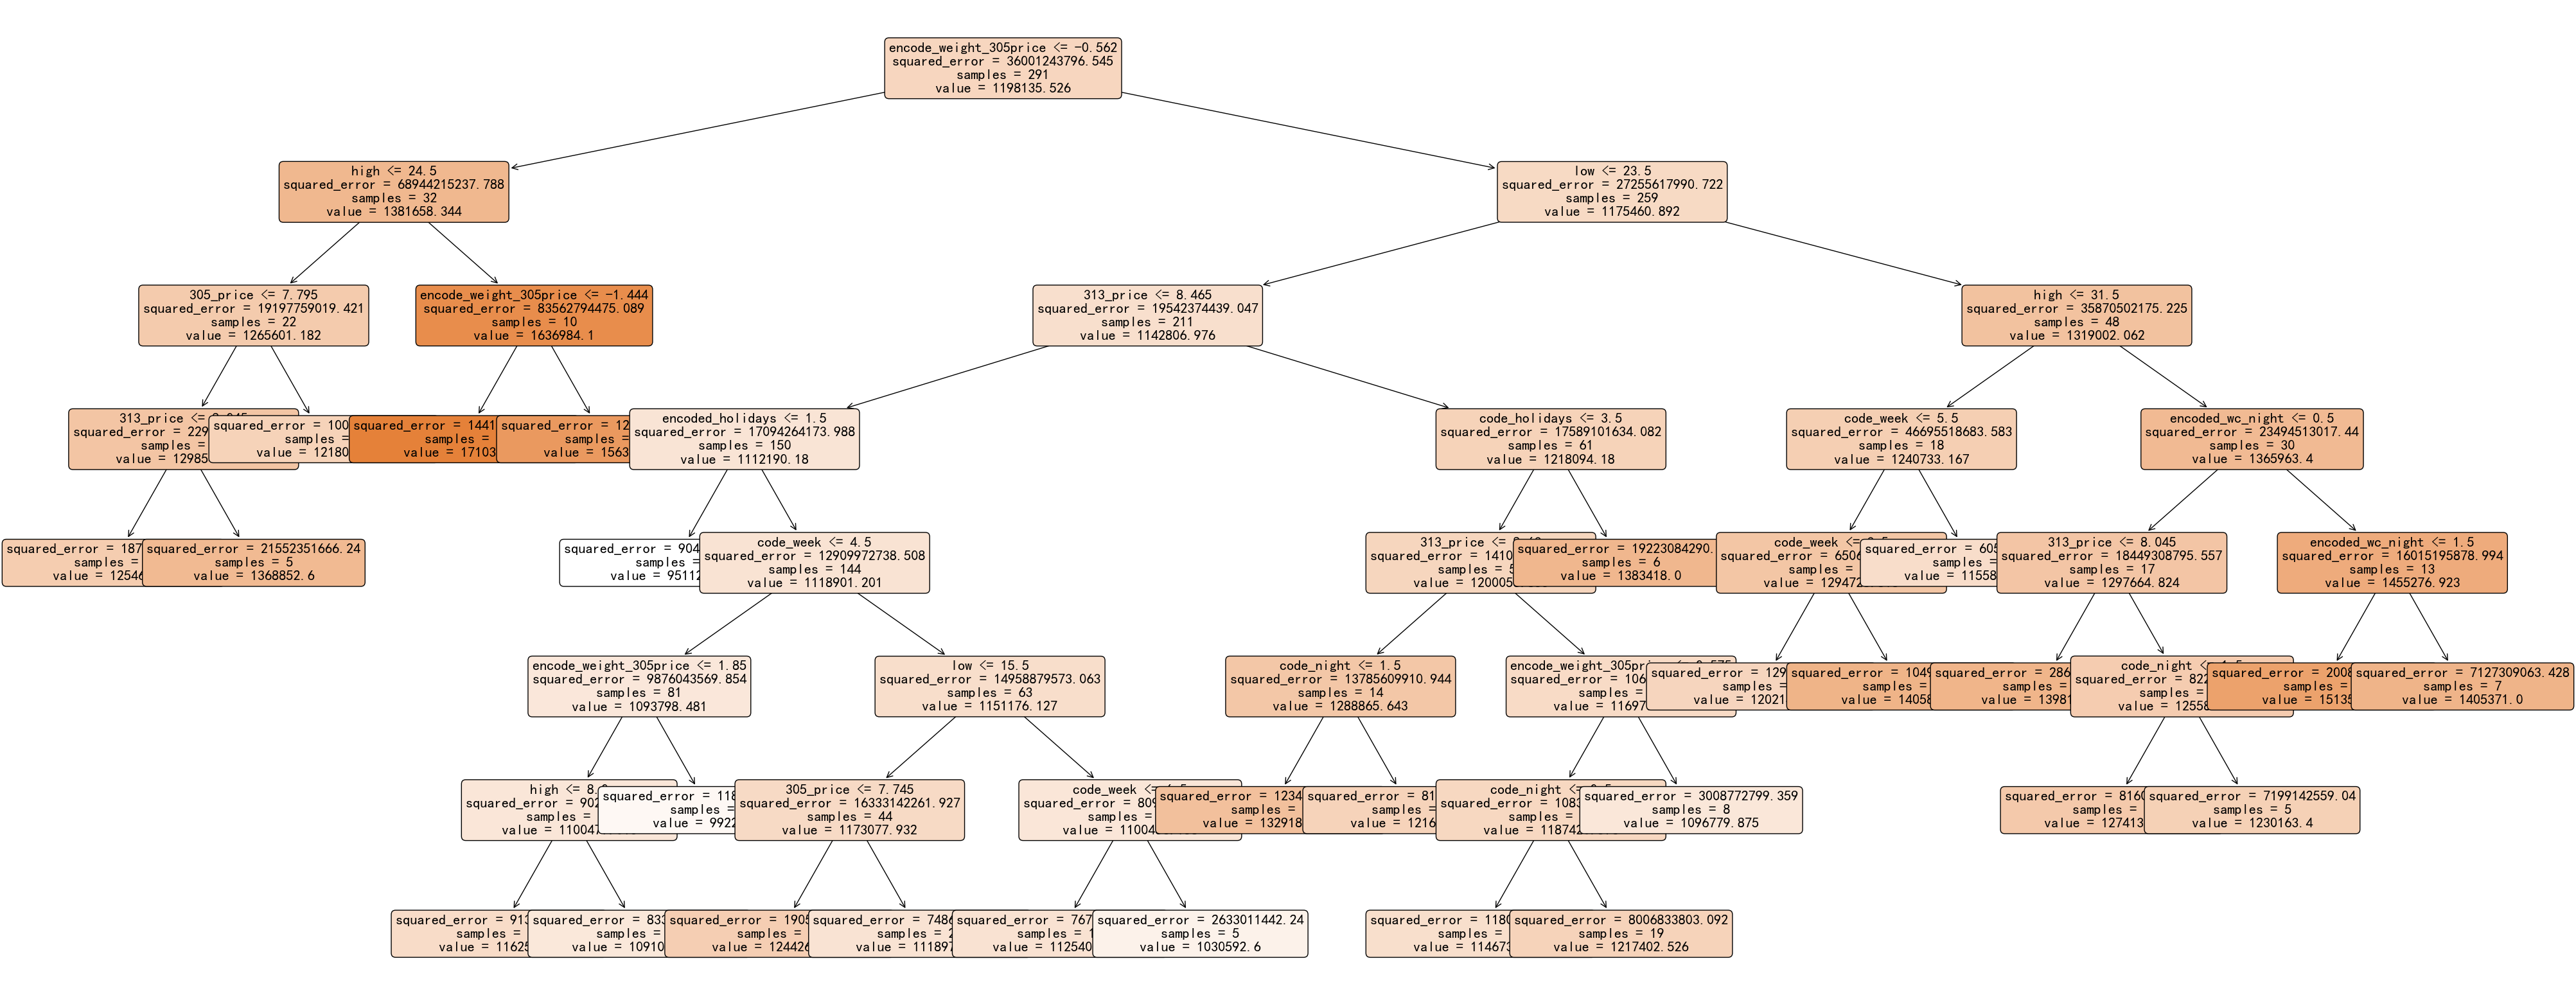

In [12]:
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['Simhei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(100,40)) #画布大小
a = tree.plot_tree(clf,
                   feature_names = feature_name,
                   rounded = True,
                   filled = True,
                   fontsize=16)
plt.show()  